#  MelodyMaster
## Notebook06 - AlephBERT
### Idan Kashani & Or Raphael Bidusa

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")
np.random.seed(42)
%load_ext tensorboard

## Architecture

In [2]:
with open("model_arch.txt") as f:
    print(f.read())

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(52000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-10): 11 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

## Training curves

In [228]:
# You might need to run this twice to get it working

%tensorboard --logdir logs5

Launching TensorBoard...

## Evaluation Results

### Training Set

#### Metrics

In [4]:
train_metrics = pd.read_csv("eval_results/train_metrics.csv")
train_metrics

,top_1_accuracy,top_5_accuracy,precision,recall,f1_macro,f1_weighted
0,0.987852,0.999542,0.98697,0.983457,0.984769,0.987742


#### Classification Report

In [5]:
train_classification_report = pd.read_csv("eval_results/train_classification_report.csv", index_col=0)
train_classification_report

,precision,recall,f1-score,support
אביב גפן,0.983607,1.000000,0.991736,120.0
שלום חנוך,1.000000,0.992308,0.996139,130.0
מאיר גולדברג,1.000000,0.956522,0.977778,46.0
מוקי,1.000000,0.977778,0.988764,45.0
יוסי גיספן,0.963964,1.000000,0.981651,107.0
...,...,...,...,...
שאנן סטריט,0.973684,1.000000,0.986667,37.0
מאיר בנאי,0.978723,1.000000,0.989247,46.0
אופיר כהן,1.000000,0.794872,0.885714,39.0
דן אלמגור,1.000000,1.000000,1.000000,38.0


#### Confusion Matrix

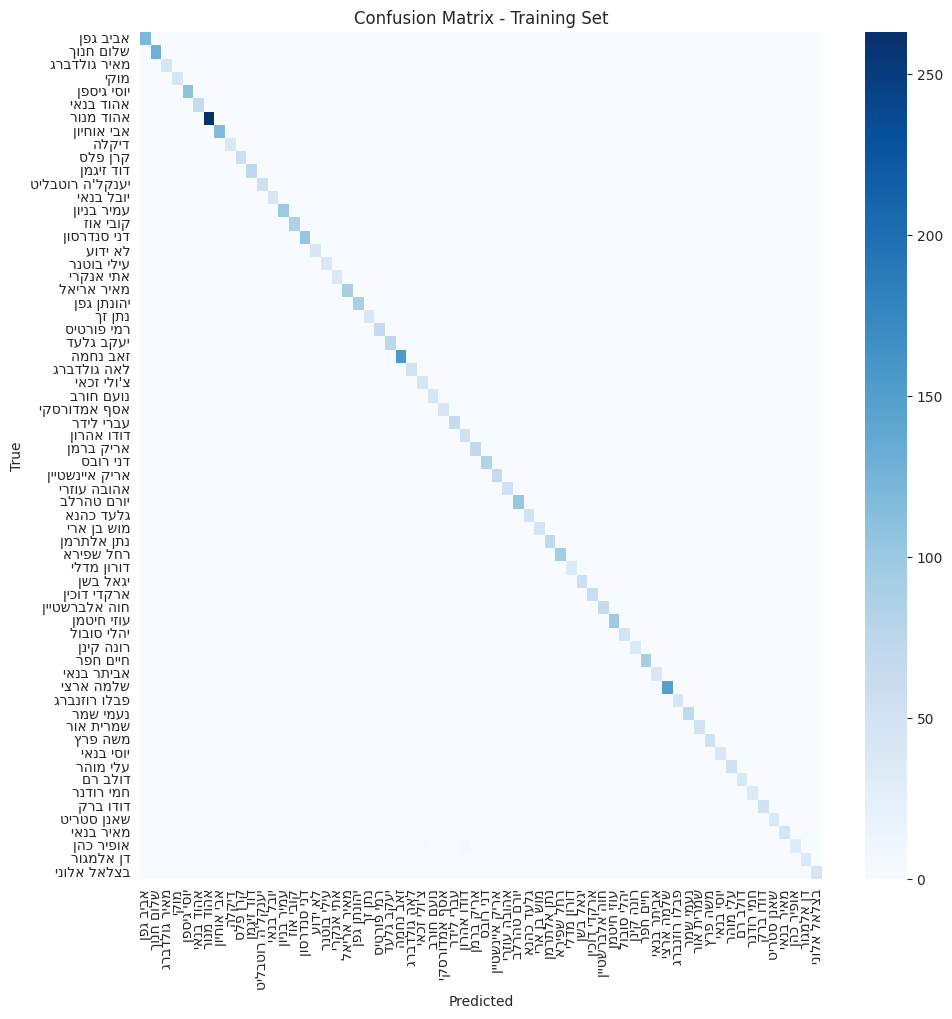

In [6]:
train_confusion_matrix = np.load("eval_results/train_confusion_matrix.npy").astype(int)
sns.heatmap(train_confusion_matrix, cmap="Blues")
labels = [l[::-1] for l in train_classification_report.index]
fig = plt.gcf()
fig.set_size_inches(11, 11)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Training Set")
plt.xticks(0.5 + np.arange(64), labels, rotation=90)
plt.yticks(0.5 + np.arange(64), labels, rotation=0)
plt.show()

### Validation Set

#### Metrics

In [7]:
val_metrics = pd.read_csv("eval_results/val_metrics.csv")
val_metrics

,top_1_accuracy,top_5_accuracy,precision,recall,f1_macro,f1_weighted
0,0.364935,0.705195,0.365547,0.339289,0.340527,0.360812


#### Classification Report

In [8]:
val_classification_report = pd.read_csv("eval_results/val_classification_report.csv", index_col=0)
val_classification_report

,precision,recall,f1-score,support
אביב גפן,0.289474,0.523810,0.372881,21.0
שלום חנוך,0.210526,0.173913,0.190476,23.0
מאיר גולדברג,0.000000,0.000000,0.000000,8.0
מוקי,0.750000,0.750000,0.750000,8.0
יוסי גיספן,0.222222,0.315789,0.260870,19.0
...,...,...,...,...
שאנן סטריט,0.400000,0.285714,0.333333,7.0
מאיר בנאי,0.250000,0.250000,0.250000,8.0
אופיר כהן,0.500000,0.142857,0.222222,7.0
דן אלמגור,0.000000,0.000000,0.000000,7.0


#### Confusion Matrix

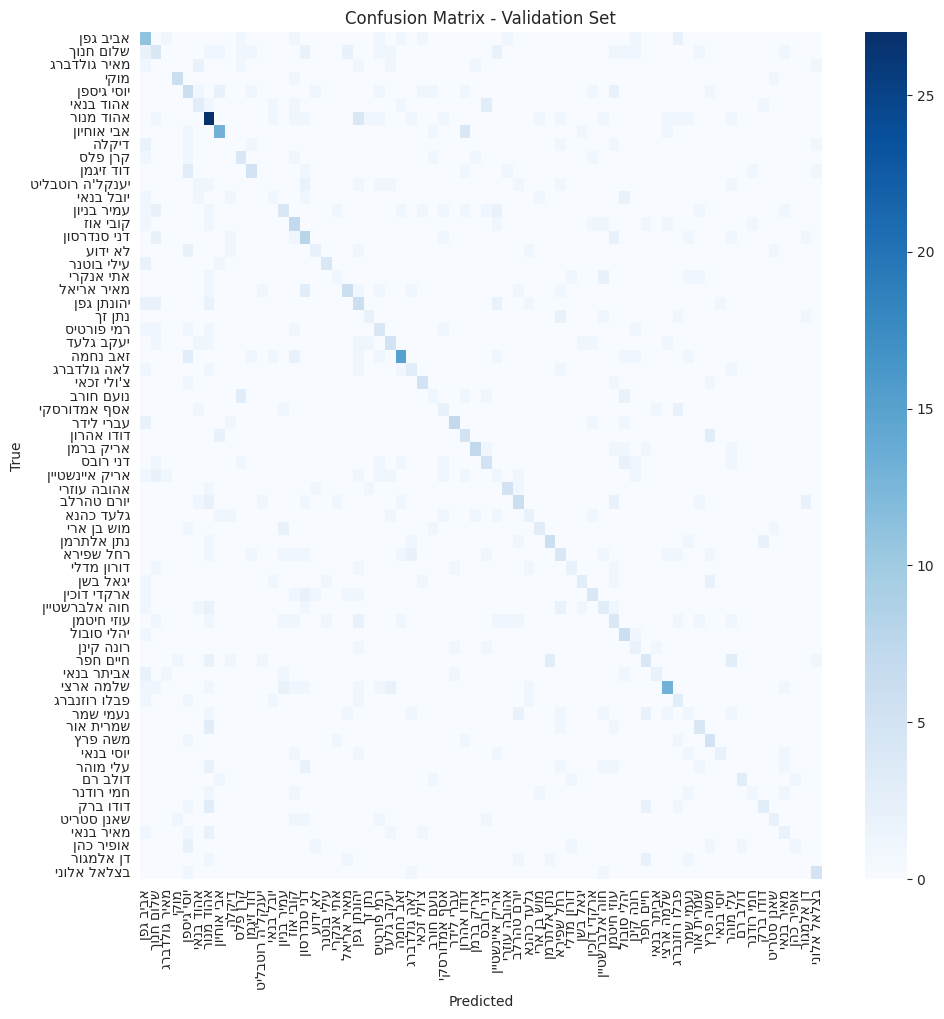

In [9]:
val_confusion_matrix = np.load("eval_results/val_confusion_matrix.npy").astype(int)
sns.heatmap(val_confusion_matrix, cmap="Blues")
labels = [l[::-1] for l in val_classification_report.index]
fig = plt.gcf()
fig.set_size_inches(11, 11)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Validation Set")
plt.xticks(0.5 + np.arange(64), labels, rotation=90)
plt.yticks(0.5 + np.arange(64), labels, rotation=0)
plt.show()

### Test Set

#### Metrics

In [10]:
test_metrics = pd.read_csv("eval_results/test_metrics.csv")
test_metrics

,top_1_accuracy,top_5_accuracy,precision,recall,f1_macro,f1_weighted
0,0.395143,0.704194,0.397743,0.379163,0.376183,0.387442


#### Classification Report

In [11]:
test_classification_report = pd.read_csv("eval_results/test_classification_report.csv", index_col=0)
test_classification_report

,precision,recall,f1-score,support
אביב גפן,0.384615,0.600000,0.468750,25.0
שלום חנוך,0.166667,0.074074,0.102564,27.0
מאיר גולדברג,0.125000,0.100000,0.111111,10.0
מוקי,1.000000,0.333333,0.500000,9.0
יוסי גיספן,0.384615,0.681818,0.491803,22.0
...,...,...,...,...
שאנן סטריט,0.500000,0.375000,0.428571,8.0
מאיר בנאי,0.384615,0.500000,0.434783,10.0
אופיר כהן,0.428571,0.375000,0.400000,8.0
דן אלמגור,0.400000,0.250000,0.307692,8.0


#### Confusion Matrix

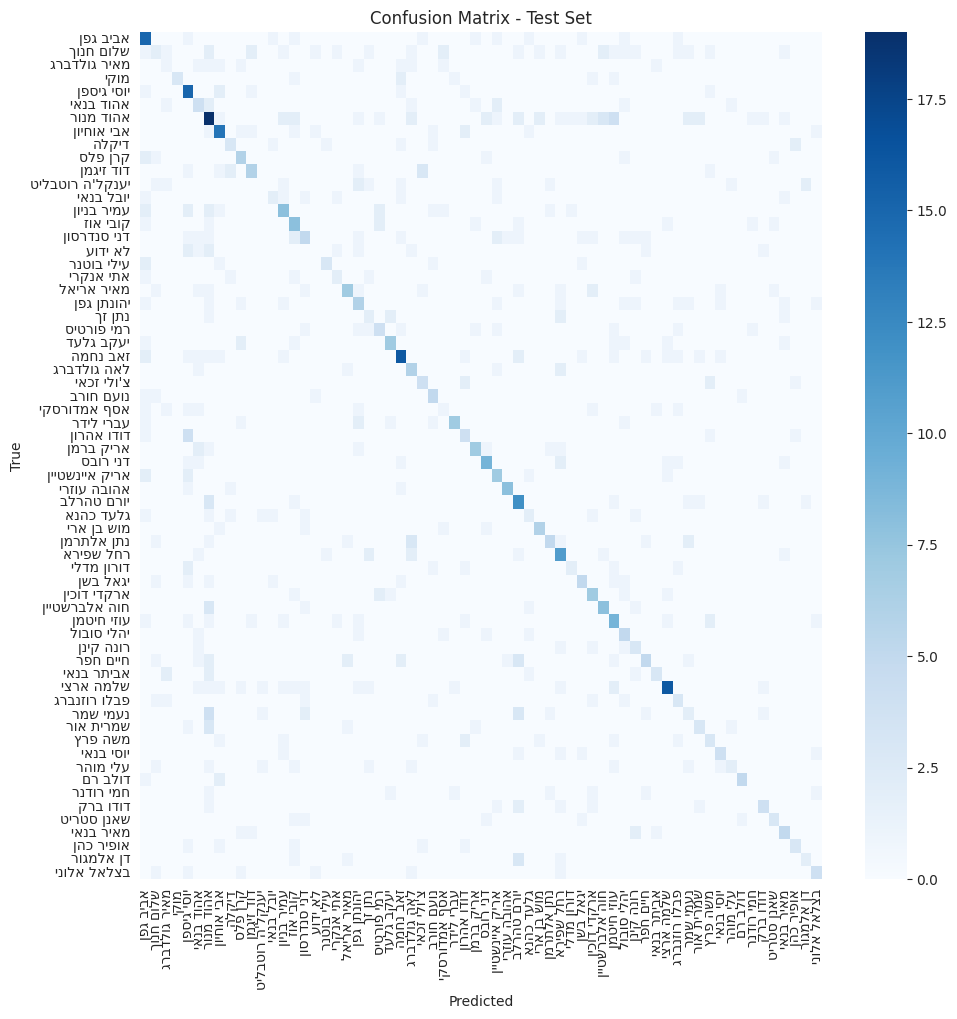

In [12]:
test_confusion_matrix = np.load("eval_results/test_confusion_matrix.npy").astype(int)
sns.heatmap(test_confusion_matrix, cmap="Blues")
labels = [l[::-1] for l in test_classification_report.index]
fig = plt.gcf()
fig.set_size_inches(11, 11)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Test Set")
plt.xticks(0.5 + np.arange(64), labels, rotation=90)
plt.yticks(0.5 + np.arange(64), labels, rotation=0)
plt.show()

## Discussion

#### Lyricists with the best classification performance

In [13]:
top_classifications = test_classification_report.sort_values(by="f1-score", ascending=False).head(10)
top_classifications

,precision,recall,f1-score,support
אהובה עוזרי,0.800000,0.727273,0.761905,11.0
דולב רם,0.714286,0.625000,0.666667,8.0
מוש בן ארי,0.600000,0.600000,0.600000,10.0
שלמה ארצי,0.695652,0.516129,0.592593,31.0
עברי לידר,0.700000,0.500000,0.583333,14.0
חוה אלברשטיין,0.571429,0.571429,0.571429,14.0
אבי אוחיון,0.500000,0.583333,0.538462,24.0
אריק ברמן,0.583333,0.500000,0.538462,14.0
דני רובס,0.529412,0.529412,0.529412,17.0
יעקב גלעד,0.583333,0.466667,0.518519,15.0


#### Lyricists with the worst classification performance

In [14]:
bottom_classifications = test_classification_report.sort_values(by="f1-score", ascending=True).head(10)
bottom_classifications

,precision,recall,f1-score,support
לא ידוע,0.000000,0.000000,0.000000,10.0
יענקל'ה רוטבליט,0.000000,0.000000,0.000000,12.0
חמי רודנר,0.000000,0.000000,0.000000,7.0
שלום חנוך,0.166667,0.074074,0.102564,27.0
מאיר גולדברג,0.125000,0.100000,0.111111,10.0
אסף אמדורסקי,0.142857,0.111111,0.125000,9.0
נעמי שמר,0.181818,0.133333,0.153846,15.0
גלעד כהנא,0.250000,0.200000,0.222222,10.0
נתן זך,0.200000,0.250000,0.222222,8.0
אהוד בנאי,0.210526,0.307692,0.250000,13.0


### Corrlations between lyricists
#### Highly correlated lyricists

In [69]:
correlations = test_confusion_matrix / test_confusion_matrix.sum(axis=1, keepdims=True)
correlations = pd.DataFrame(correlations, index=test_classification_report.index,
                            columns=test_classification_report.index)
correlations = correlations.mask(np.eye(correlations.shape[0], dtype=bool))
correlation_rank = correlations.stack().reset_index()
correlation_rank.columns = ["lyricist 1", "lyricist 2", "correlation"]
correlation_rank.sort_values(by="correlation", ascending=False, inplace=True)
correlation_rank.reset_index(drop=True, inplace=True)
correlation_rank.head(30)

,lyricist 1,lyricist 2,correlation
0,דן אלמגור,יורם טהרלב,0.375000
1,דודו אהרון,יוסי גיספן,0.363636
2,שמרית אור,אהוד מנור,0.300000
3,נעמי שמר,אהוד מנור,0.266667
4,דורון מדלי,יוסי גיספן,0.250000
5,עילי בוטנר,אביב גפן,0.250000
6,נתן זך,רחל שפירא,0.250000
7,נתן זך,יעקב גלעד,0.250000
8,דולב רם,אבי אוחיון,0.250000
9,צ'ולי זכאי,משה פרץ,0.222222


In [83]:
correlations.fillna(1, inplace=True)
correlations

,אביב גפן,שלום חנוך,מאיר גולדברג,מוקי,יוסי גיספן,אהוד בנאי,אהוד מנור,אבי אוחיון,דיקלה,קרן פלס,...,יוסי בנאי,עלי מוהר,דולב רם,חמי רודנר,דודו ברק,שאנן סטריט,מאיר בנאי,אופיר כהן,דן אלמגור,בצלאל אלוני
אביב גפן,1.000000,0.0,0.000000,0.0,0.040,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
שלום חנוך,0.037037,1.0,0.037037,0.0,0.000,0.0,0.074074,0.000000,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.037037,0.0,0.0,0.0
מאיר גולדברג,0.000000,0.0,1.000000,0.0,0.000,0.1,0.100000,0.100000,0.0,0.1,...,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
מוקי,0.000000,0.0,0.000000,1.0,0.000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
יוסי גיספן,0.045455,0.0,0.000000,0.0,1.000,0.0,0.000000,0.090909,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
שאנן סטריט,0.000000,0.0,0.000000,0.0,0.000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.125,0.0,0.0,1.0,0.000000,0.0,0.0,0.0
מאיר בנאי,0.000000,0.0,0.000000,0.0,0.000,0.0,0.000000,0.000000,0.0,0.1,...,0.0,0.0,0.000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
אופיר כהן,0.000000,0.0,0.000000,0.0,0.125,0.0,0.000000,0.125000,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,1.0,0.0,0.0
דן אלמגור,0.000000,0.0,0.000000,0.0,0.000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,1.0,0.0


#### Correlation-based clustering
We treat every lyricist as a point in a 64-dimensional space, and calculate the Manhattan distance between them, according to their correlation matrix (which is derived from the confusion matrix).
Then we use KMeans clustering to cluster the lyricists based on their distance from each other.

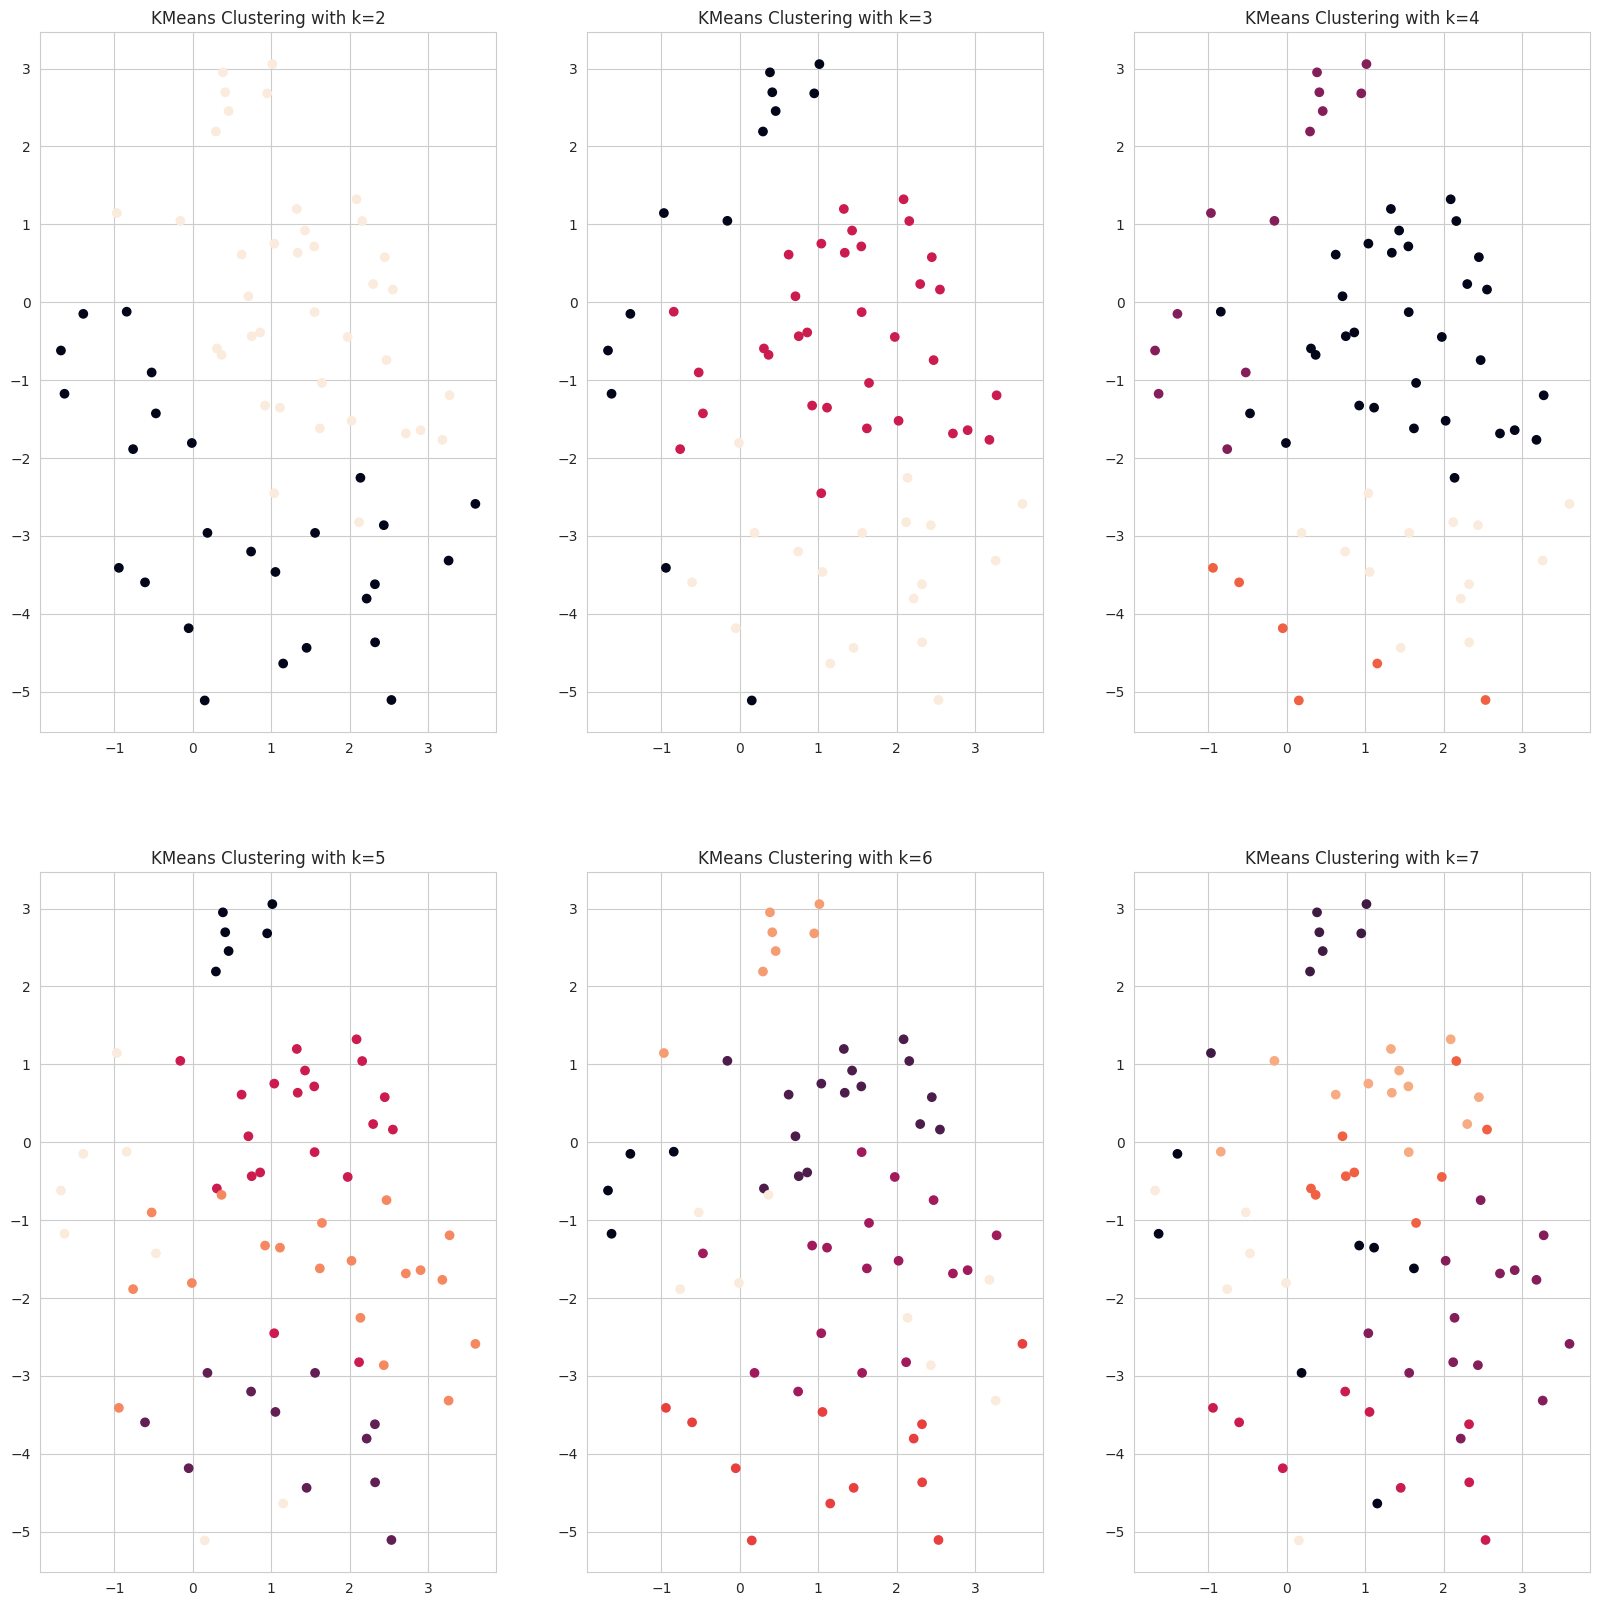

In [246]:
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

similarity_matrix = manhattan_distances(correlations)
# plot clusters with different k values
plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
for k in range(2, 8):
    clusters = KMeans(n_clusters=k).fit_predict(similarity_matrix)
    tsne = TSNE(n_components=2, random_state=42)
    tsne.fit(similarity_matrix)
    tsne_results = tsne.fit_transform(similarity_matrix)
    plt.subplot(2, 3, k - 1)
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters)
    plt.title(f"KMeans Clustering with k={k}")

#### Silhouette Scores
Lower k values seem to have higher silhouette scores, but the clusters are not very distinct.
This means that the number of genres is not very well-defined.

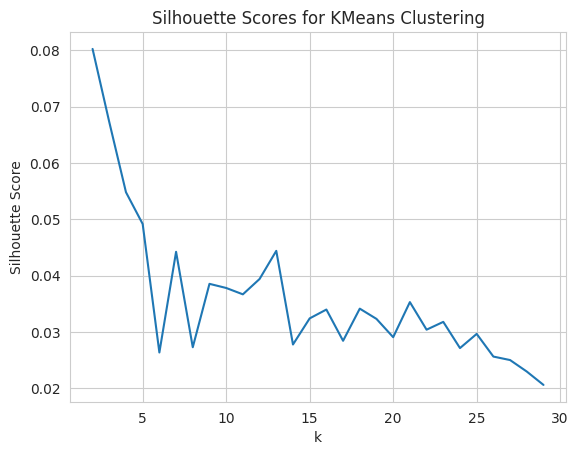

In [118]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 30):
    clusters = KMeans(n_clusters=k).fit_predict(similarity_matrix)
    silhouette_scores.append(silhouette_score(similarity_matrix, clusters))
plt.plot(range(2, 30), silhouette_scores)
plt.title("Silhouette Scores for KMeans Clustering")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

#### Agglomerative Clustering
We also try agglomerative clustering, which is a hierarchical clustering method, meaning that it creates a hierarchy of clusters that can be visualized as a tree (dendrogram), and then cuts the tree at a certain height to get the clusters.
This method is more suitable for our case, since we don't have a clear number of clusters, and music generes are usually nested within each other.

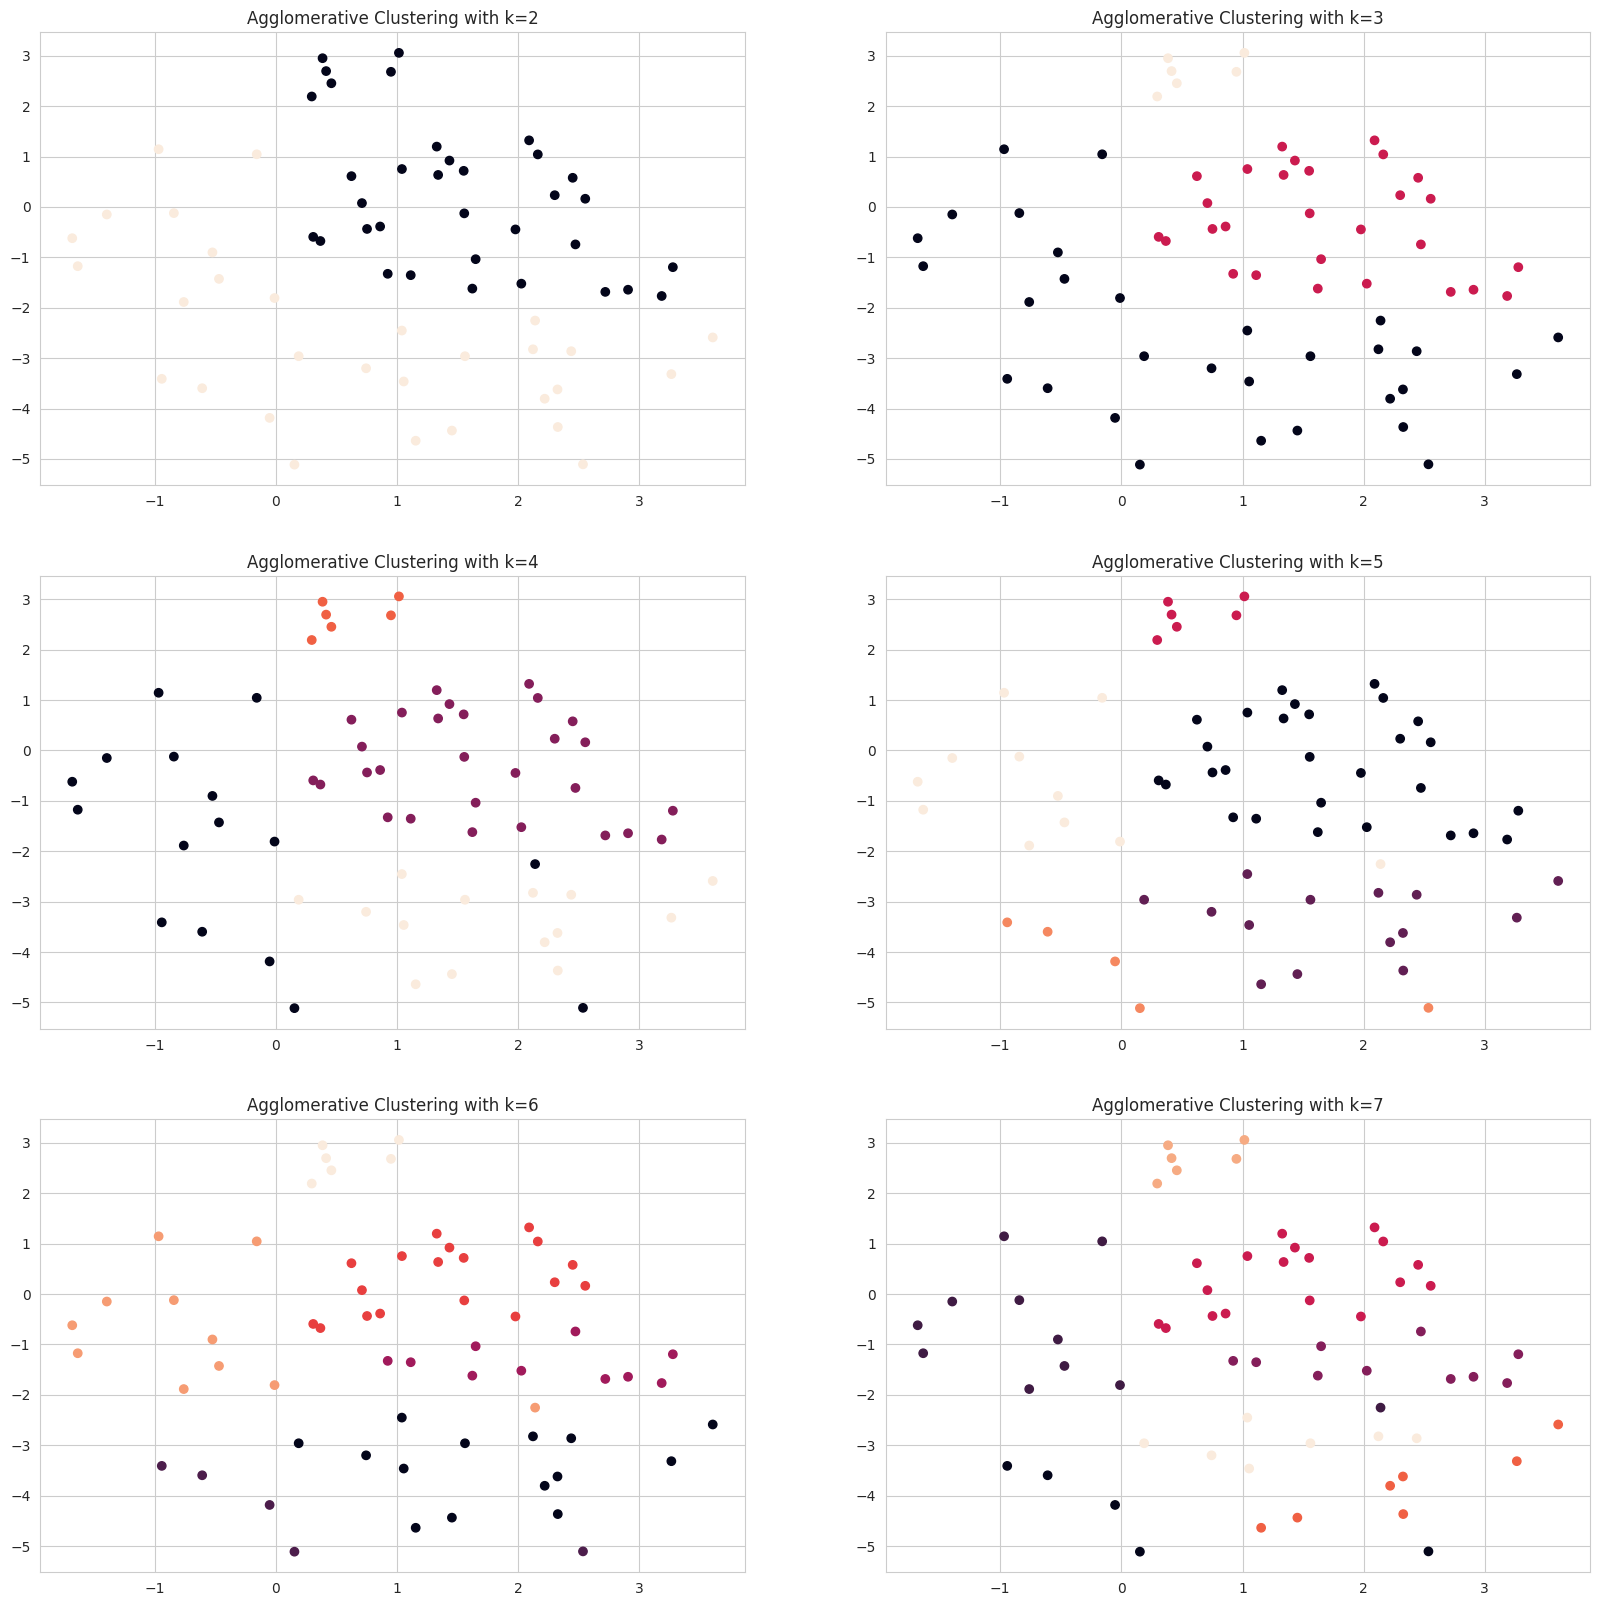

In [247]:
from sklearn.cluster import AgglomerativeClustering

plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
for k in range(2, 8):
    clusters = AgglomerativeClustering(n_clusters=k).fit_predict(similarity_matrix)
    tsne = TSNE(n_components=2, random_state=42)
    tsne.fit(similarity_matrix)
    tsne_results = tsne.fit_transform(similarity_matrix)
    plt.subplot(3, 2, k - 1)
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters)
    plt.title(f"Agglomerative Clustering with k={k}")

#### Confusion Graph-based clustering
A more intuitive way to cluster the lyricists is to use a graph-based clustering method.
We create a graph where each node is a lyricist, and the edges are weighted by the number of times the two lyricists were confused.
This allows us to cluster the lyricists, in a Louvain-like fashion, by maximizing the modularity of the graph.

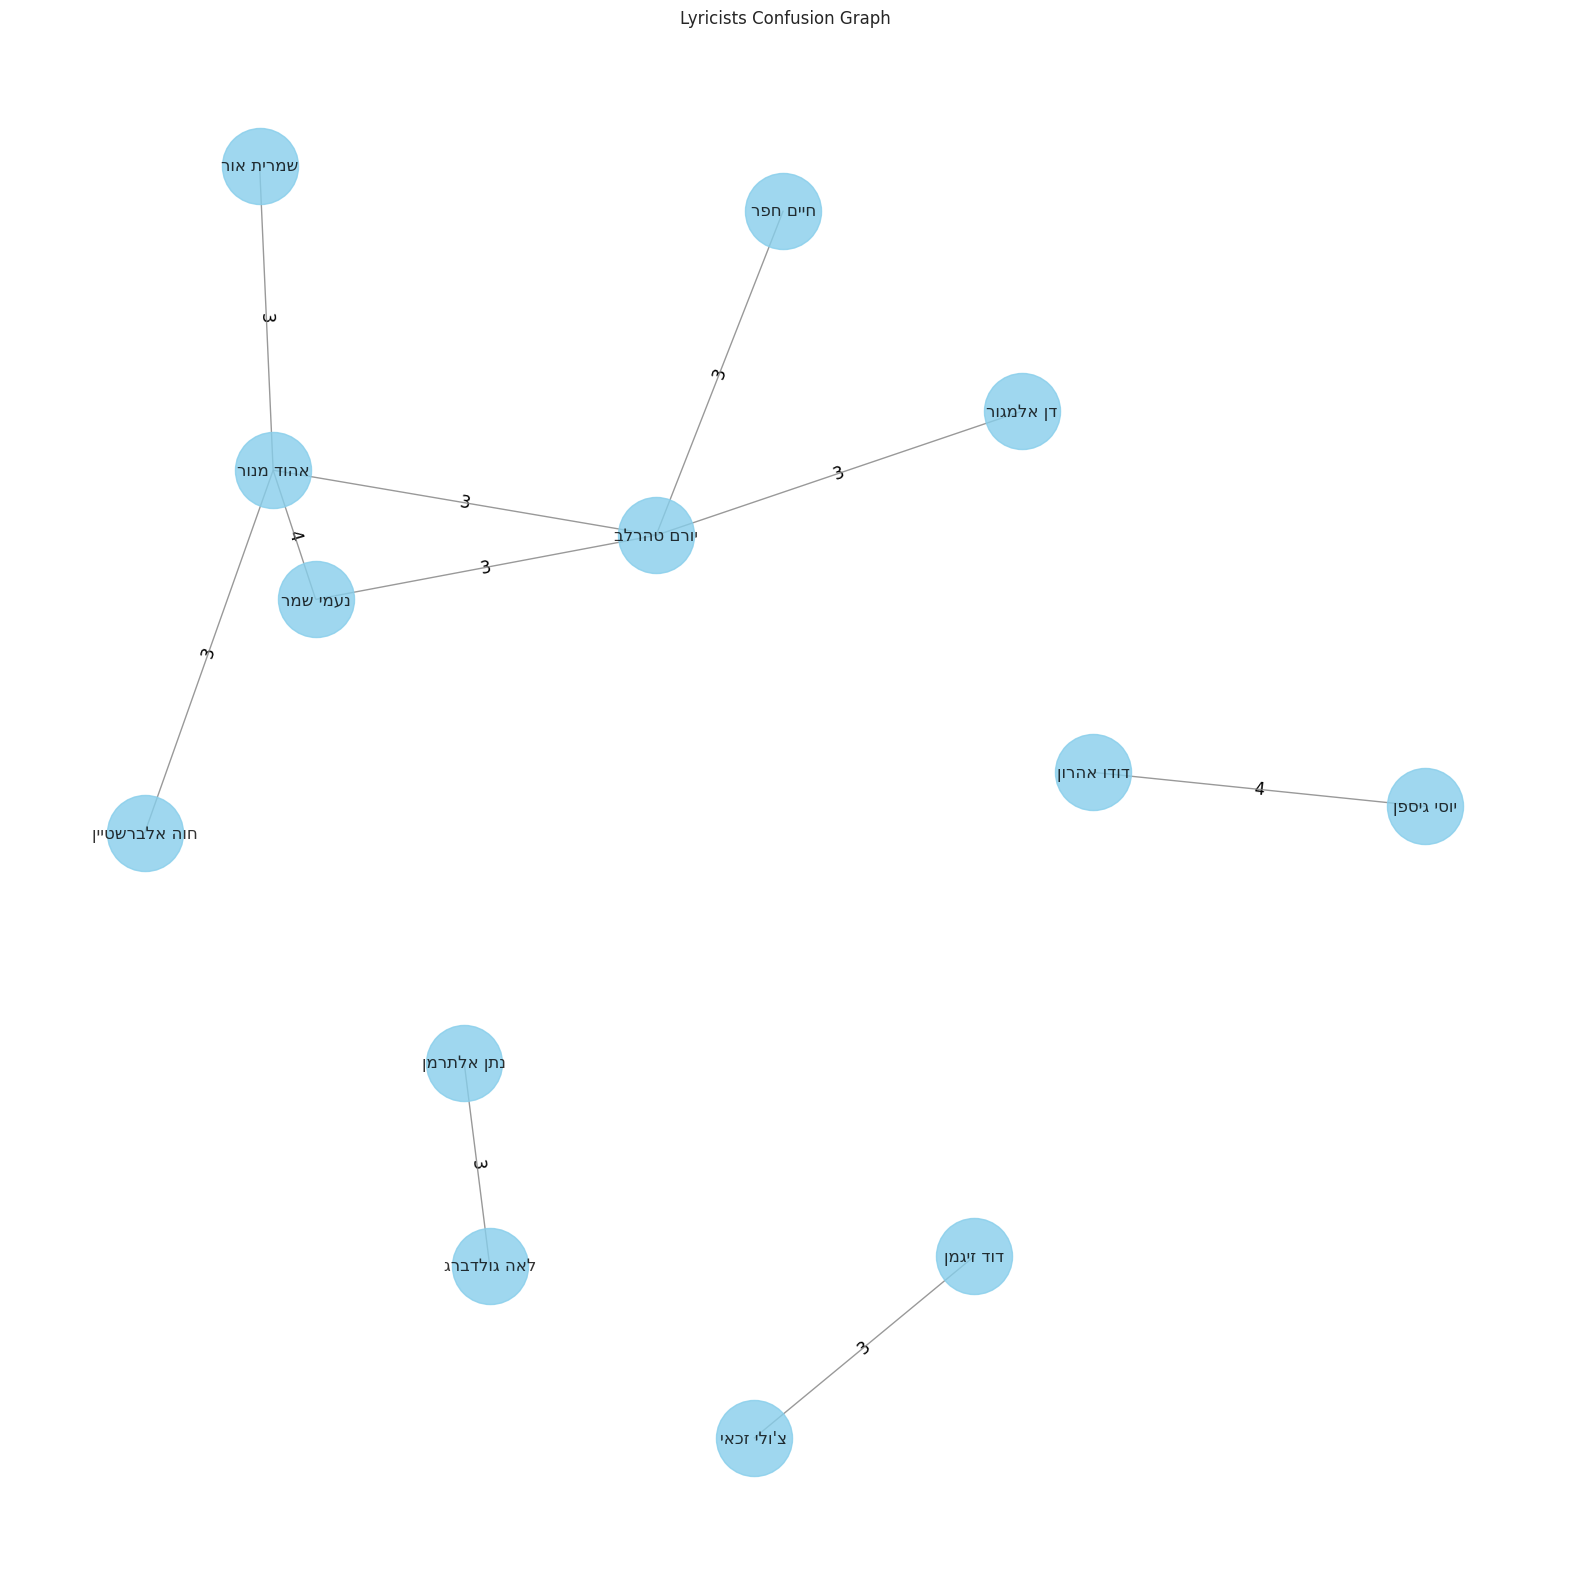

In [249]:
import networkx as nx


def get_confusion_graph(threshold=0):
    G = nx.from_numpy_array(test_confusion_matrix)
    G.remove_edges_from(nx.selfloop_edges(G))
    G.to_undirected()
    mapping = {i: l[::-1] for i, l in enumerate(test_classification_report.index)}
    G = nx.relabel_nodes(G, mapping)
    for edge in list(G.edges(data=True)):
        if edge[2]["weight"] < threshold:
            G.remove_edge(edge[0], edge[1])
    G.remove_nodes_from(list(nx.isolates(G)))
    # add edge weights to node attributes
    return G


def plot_graph(G, title=""):
    plt.figure(figsize=(20, 20))
    pos = nx.spring_layout(G, k=0.5, iterations=20)
    # add weights to edges
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
    nx.draw(G, pos, with_labels=True, node_size=3000, font_size=12, node_color="skyblue", edge_color="grey", width=1,
            alpha=0.8, arrowsize=20, linewidths=1)
    plt.title(title)
    plt.show()


plot_graph(get_confusion_graph(3), title="Lyricists Confusion Graph")

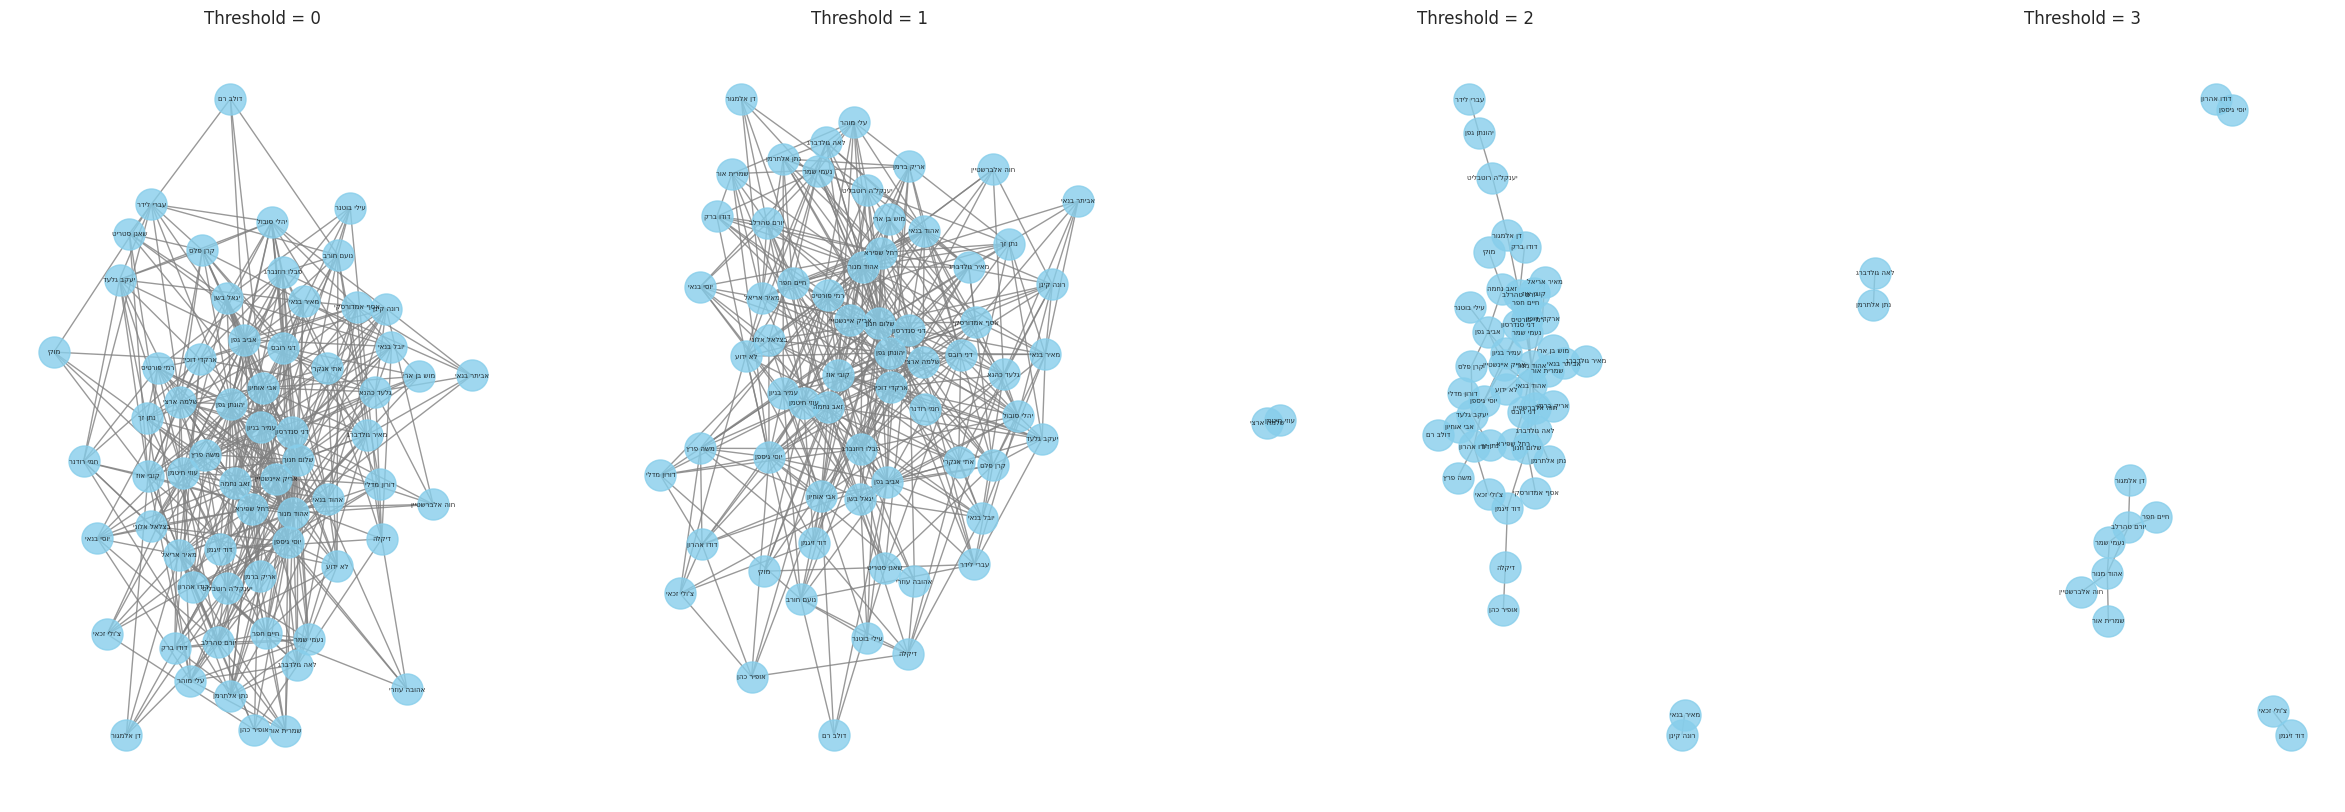

In [250]:
plt.subplots(nrows=1, ncols=4, figsize=(30, 10))
for threshold in range(4):
    plt.subplot(1, 4, threshold + 1)
    G = get_confusion_graph(threshold)
    nx.draw(G, with_labels=True, node_size=500, font_size=5, node_color="skyblue", edge_color="grey", width=1,
            alpha=0.8, arrowsize=20, linewidths=1)
    plt.title(f"Threshold = {threshold}")
plt.show()

#### Correlation Graph-based Clustering
We can also cluster the lyricists based on the correlations and get a more continuous weighted graph representation.

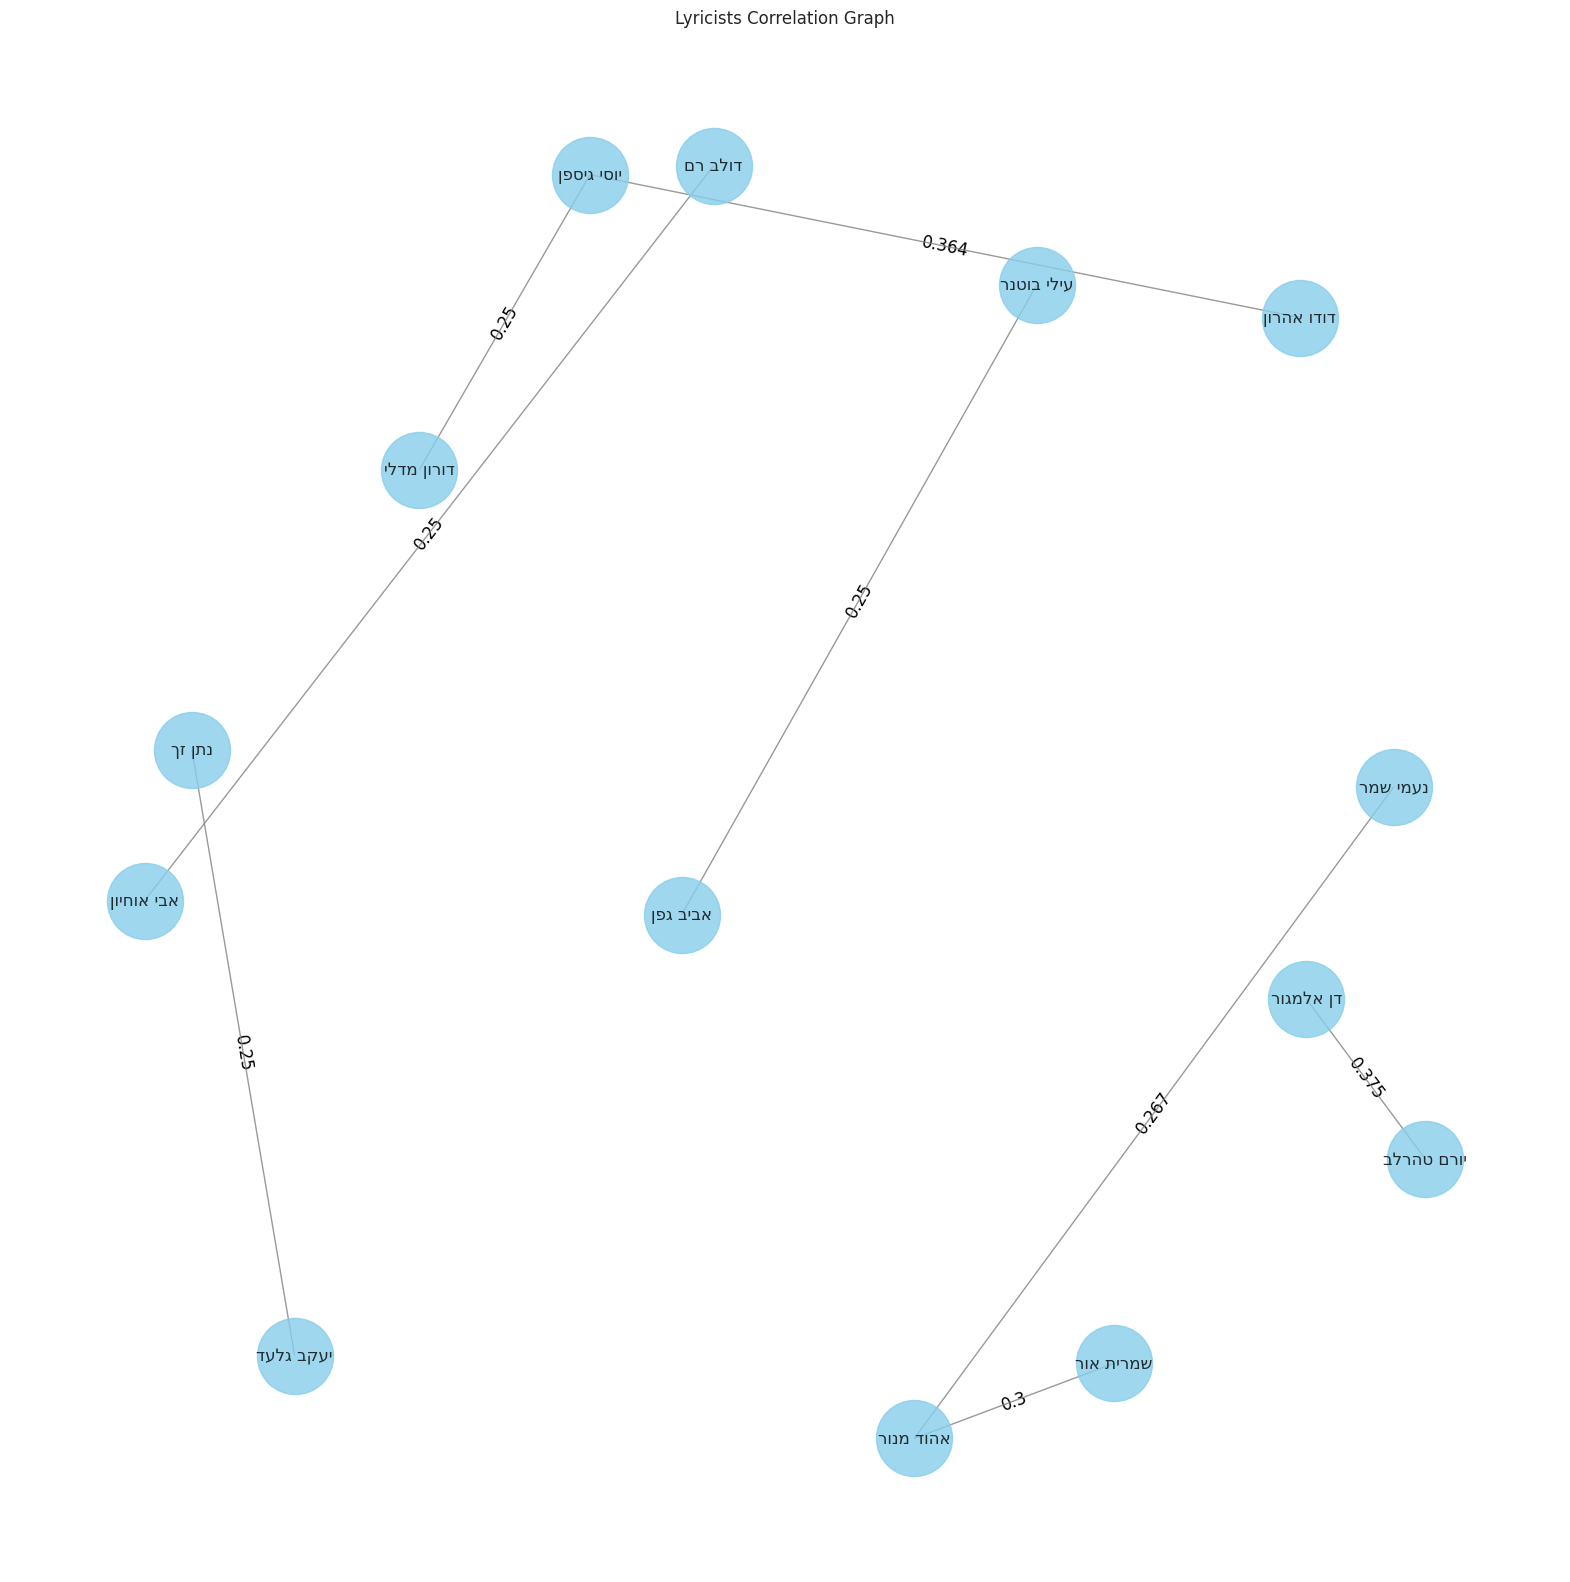

In [257]:
def get_correlation_graph(threshold=1e-3):
    G = nx.from_numpy_array(correlations.values)
    G.remove_edges_from(nx.selfloop_edges(G))
    G.to_undirected()
    mapping = {i: l[::-1] for i, l in enumerate(test_classification_report.index)}
    G = nx.relabel_nodes(G, mapping)
    for edge in list(G.edges(data=True)):
        if edge[2]["weight"] < threshold:
            G.remove_edge(edge[0], edge[1])
        else:
            G[edge[0]][edge[1]]["weight"] = round(edge[2]["weight"], 3)
    G.remove_nodes_from(list(nx.isolates(G)))
    # add edge weights to node attributes
    return G

plot_graph(get_correlation_graph(0.25), title="Lyricists Correlation Graph")